http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

In [1]:
import pandas as pd

import numpy as np
import keras

from matplotlib import pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Country,Life Expectancy,People per Television,People per Physician,Female Life Expectancy,Male Life Expectancy
0,Argentina,70.5,4,370,74,67
1,Bangladesh,53.5,315,6166,53,54
2,Brazil,65.0,4,684,68,62
3,Canada,76.5,1.7,449,80,73
4,China,70.0,8,643,72,68
5,Colombia,71.0,5.6,1551,74,68
6,Egypt,60.5,15,616,61,60
7,Ethiopia,51.5,503,36660,53,50
8,France,78.0,2.6,403,82,74
9,Germany,76.0,2.6,346,79,73


In [4]:
df.columns,df.dtypes

(Index(['Country', 'Life Expectancy', 'People per Television',
        'People per Physician', 'Female Life Expectancy',
        'Male Life Expectancy'],
       dtype='object'), Country                    object
 Life Expectancy           float64
 People per Television      object
 People per Physician        int64
 Female Life Expectancy      int64
 Male Life Expectancy        int64
 dtype: object)

In [5]:
# df["People per Television"] = df["People per Television"].as_numeric
df["People per Television"] = pd.to_numeric(df["People per Television"],errors='coerce')

In [6]:
df = df.dropna()

In [7]:
df.head()

,Country,Life Expectancy,People per Television,People per Physician,Female Life Expectancy,Male Life Expectancy
0,Argentina,70.5,4.0,370,74,67
1,Bangladesh,53.5,315.0,6166,53,54
2,Brazil,65.0,4.0,684,68,62
3,Canada,76.5,1.7,449,80,73
4,China,70.0,8.0,643,72,68
5,Colombia,71.0,5.6,1551,74,68
6,Egypt,60.5,15.0,616,61,60
7,Ethiopia,51.5,503.0,36660,53,50
8,France,78.0,2.6,403,82,74
9,Germany,76.0,2.6,346,79,73


In [46]:
# x = ppl/television
# y = ppl/doctor

x = df["People per Television"].values.reshape(-1,1).astype(np.float64)
y = df["People per Physician"].values.reshape(-1,1).astype(np.float64)

x.shape,y.shape

((38, 1), (38, 1))

Epoch 1/10
38/38 [==============================] - 0s - loss: 1.3074     
Epoch 2/10
38/38 [==============================] - 0s - loss: 0.9138     
Epoch 3/10
38/38 [==============================] - 0s - loss: 0.8301     
Epoch 4/10
38/38 [==============================] - 0s - loss: 0.8089     
Epoch 5/10
38/38 [==============================] - 0s - loss: 0.8024     
Epoch 6/10
38/38 [==============================] - 0s - loss: 0.8001     
Epoch 7/10
38/38 [==============================] - 0s - loss: 0.7993     
Epoch 8/10
38/38 [==============================] - 0s - loss: 0.7989     
Epoch 9/10
38/38 [==============================] - 0s - loss: 0.7988     
Epoch 10/10
38/38 [==============================] - 0s - loss: 0.7987     


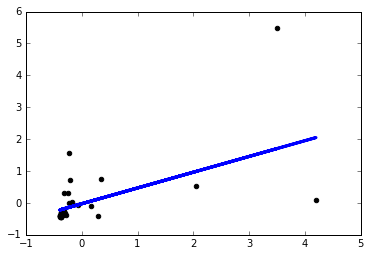

In [45]:
sc = StandardScaler()
x_ = sc.fit_transform(x)
y_ = sc.fit_transform(y)

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse')
model.fit(x_,y_, batch_size=1, verbose=1, epochs=10, shuffle=False)
plt.scatter(x_,y_,color='black')
plt.plot(x_,model.predict(x_), color='blue', linewidth=3)

Epoch 1/10
38/38 [==============================] - 0s - loss: 0.0811         
Epoch 2/10
38/38 [==============================] - 0s - loss: 0.0749        
Epoch 3/10
38/38 [==============================] - 0s - loss: 0.0704     
Epoch 4/10
38/38 [==============================] - 0s - loss: 0.0666     
Epoch 5/10
38/38 [==============================] - 0s - loss: 0.0631     
Epoch 6/10
38/38 [==============================] - 0s - loss: 0.0599     
Epoch 7/10
38/38 [==============================] - 0s - loss: 0.0570     
Epoch 8/10
38/38 [==============================] - 0s - loss: 0.0542     
Epoch 9/10
38/38 [==============================] - 0s - loss: 0.0517     
Epoch 10/10
38/38 [==============================] - 0s - loss: 0.0493        


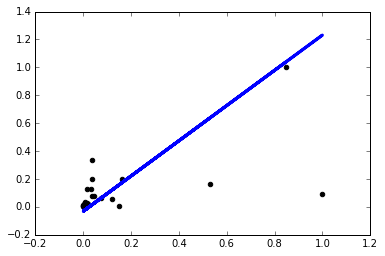

In [44]:
# min-max 0,1
sc = MinMaxScaler(feature_range=(0,1))
x_ = sc.fit_transform(x)
y_ = sc.fit_transform(y)

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse')
model.fit(x_,y_, batch_size=1, epochs=10, verbose=1, shuffle=False)
plt.scatter(x_,y_,color='black')
plt.plot(x_,model.predict(x_), color='blue', linewidth=3)

Epoch 1/10
38/38 [==============================] - 0s - loss: 0.1739     
Epoch 2/10
38/38 [==============================] - 0s - loss: 0.0847     
Epoch 3/10
38/38 [==============================] - 0s - loss: 0.0775     
Epoch 4/10
38/38 [==============================] - 0s - loss: 0.0762     
Epoch 5/10
38/38 [==============================] - 0s - loss: 0.0755     
Epoch 6/10
38/38 [==============================] - 0s - loss: 0.0750     
Epoch 7/10
38/38 [==============================] - 0s - loss: 0.0745     
Epoch 8/10
38/38 [==============================] - 0s - loss: 0.0741     
Epoch 9/10
38/38 [==============================] - 0s - loss: 0.0738     
Epoch 10/10
38/38 [==============================] - 0s - loss: 0.0736     


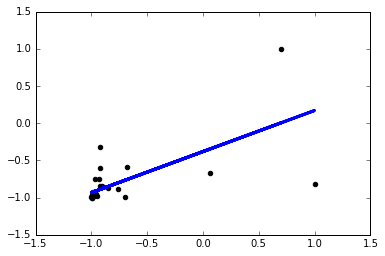

In [50]:
# min-max -1,1
sc = MinMaxScaler(feature_range=(-1,1))
x_ = sc.fit_transform(x)
y_ = sc.fit_transform(y)

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse')
model.fit(x_,y_, batch_size=1, verbose=1, epochs=10, shuffle=False)
plt.scatter(x_,y_,color='black')
plt.plot(x_,model.predict(x_), color='blue', linewidth=3)